<a href="https://colab.research.google.com/github/Kisame2510/A.I-Training/blob/main/Face_Recognition/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [70]:
pip install mtcnn

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
filenames= os.listdir("/content/drive/MyDrive/A.I Training data/data_face_rec/train/")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='trang':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

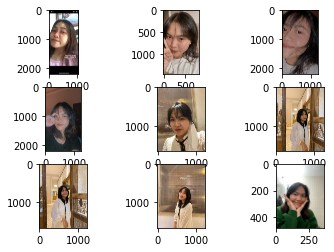

In [73]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/A.I Training data/data_face_rec/train/trang/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'trang ' +'('+ str(i+1) + ')'+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [74]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'],run_eagerly=True)
#model.summary()

In [75]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [76]:
df["category"] = df["category"].replace({0:'trang',1:'tuan'})
train_df,validate_df = train_test_split(df,test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [77]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/A.I Training data/data_face_rec/train/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/A.I Training data/data_face_rec/validation/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 60 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [78]:
history=model.fit(train_dataset,batch_size=15,epochs=10,verbose=1,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/10
4/4 [==============================] - 10s 2s/step - loss: 1.2464 - accuracy: 0.7500 - lr: 0.0010
Epoch 2/10
4/4 [==============================] - 16s 4s/step - loss: 1.1332 - accuracy: 0.7833 - lr: 0.0010
Epoch 3/10
4/4 [==============================] - 14s 3s/step - loss: 0.8058 - accuracy: 0.8000 - lr: 0.0010
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.4030 - accuracy: 0.8500 - lr: 0.0010
Epoch 5/10
4/4 [==============================] - 8s 2s/step - loss: 0.4750 - accuracy: 0.9000 - lr: 0.0010
Epoch 6/10
4/4 [==============================] - 11s 3s/step - loss: 0.5598 - accuracy: 0.8000 - lr: 0.0010
Epoch 7/10
4/4 [==============================] - 8s 2s/step - loss: 0.5737 - accuracy: 0.8167 - lr: 0.0010
Epoch 8/10
4/4 [==============================] - 8s 2s/step - loss: 0.3510 - accuracy: 0.9000 - lr: 0.0010
Epoch 9/10
4/4 [==============================] - 8s 2s/step - loss: 0.1427 - accuracy: 0.9167 - lr: 0.0010
Epoch 10/10
4/4 [=======

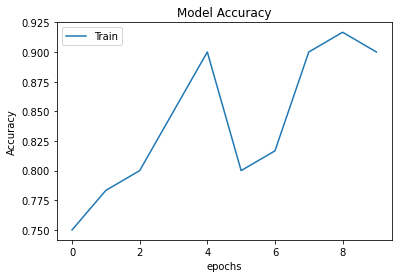

In [79]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [80]:
model.save('face_rec_10epochs.h5')

In [81]:
categories

[1, 0]

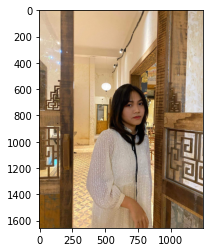

array([0])

In [90]:
filename = '/content/2021-12-27 12.54 (1).jpg'
#filename  = '/content/tuan7.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis= -1)

In [83]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='tuan'+input()+'.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

1


In [84]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

'NoneType' object has no attribute 'split'
